In [1]:
# Pandas and Timeseries
# Download a dump of data about closed GitHub issues for the pandas project here:
# https://www.dropbox.com/s/pe6dqooznrfynii/closed.json
# Use the built-in json library to read this file into memory. Each element in the list contains information about a GitHub 
# issue and all developer comments that were made on it in the 'comments' field.

In [2]:
import matplotlib.pyplot as plt

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import json
import pandas as pd
import numpy as np
from datetime import datetime

In [5]:
pwd

'c:\\code\\Python_For_Data_Science\\Fu-Chi\\Homework7'

In [6]:
!ls

closed.json
hw7_Pandas.ipynb


In [7]:
!head closed.json

[
  {
    "body": "re: pystatsmodels e-mail\r\n\r\n\r\nhi everyone,\r\n\r\njust getting started with pandas and i was wondering if someone could\r\nhelp me out.  do pandas.DataMatrix objects support per item comparison\r\noperations?\r\n\r\ni have a two data matrices, and i want to do something like this:\r\n\r\ndiv[div > 0.5 * price] = 0\r\n\r\nthis would work if div and price were numpy.ndarray objects.  any idea\r\nhow i would do something like this with pandas.DataMatrix objects?\r\n\r\nthanks,\r\nandy\r\n", 
    "labels": [], 
    "title": "Enable element-wise comparison operations in DataMatrix objects", 
    "url": "https://api.github.com/repos/pydata/pandas/issues/1", 
    "labels_url": "https://api.github.com/repos/pydata/pandas/issues/1/labels{/name}", 
    "created_at": "2010-09-29T00:45:31Z", 
    "events_url": "https://api.github.com/repos/pydata/pandas/issues/1/events", 
    "comments_url": "https://api.github.com/repos/pydata/pandas/issues/1/comments", 


In [8]:
### ------ Task 1 ---------- ###
# Make a DataFrame with one row per issue with the following columns extracted from the issue data:
# title, created_at, labels, closed_at, user, id
# Transform the user values to be simply the 'login' string, so that the user column contains only string usernames.
with open('closed.json') as data_file:    
    data = json.load(data_file)

data = pd.DataFrame(data, columns=["title", "created_at", "labels", "closed_at", "user", "id"])
for i in range(len(data.index)):
    data.loc[i,'user'] = data.loc[i,'user']['login']
data.head(3)

,title,created_at,labels,closed_at,user,id
0,Enable element-wise comparison operations in D...,2010-09-29T00:45:31Z,[],2011-02-19T23:13:48Z,wesm,337721
1,Enable element-wise comparison operations in D...,2010-09-29T00:45:31Z,[],2011-02-19T23:13:48Z,wesm,337721
2,reindex_like function,2010-09-29T00:50:13Z,[],2010-12-17T02:57:33Z,wesm,337726


In [9]:
## Another way of reading data
df = pd.read_json('closed.json')
df.shape # (2968, 19)

(2968, 19)

In [10]:
df.columns

Index(['assignee', 'body', 'closed_at', 'comments', 'comments_url',
       'created_at', 'events_url', 'html_url', 'id', 'labels', 'labels_url',
       'milestone', 'number', 'pull_request', 'state', 'title', 'updated_at',
       'url', 'user'],
      dtype='object')

In [11]:
df2 = df[['title', 'created_at', 'labels', 'closed_at', 'user', 'id']]
df2.user[0]
type(df2.user[0]) # We note that df2.user[0] is a dictionary

dict

In [12]:
### ------ Task 2 ---------- ###
# Remove duplicate rows by id from the DataFrame you just created using the id column's duplicated method.
data_cl = data.drop_duplicates(["id"])
data_cl.head(3)

,title,created_at,labels,closed_at,user,id
0,Enable element-wise comparison operations in D...,2010-09-29T00:45:31Z,[],2011-02-19T23:13:48Z,wesm,337721
2,reindex_like function,2010-09-29T00:50:13Z,[],2010-12-17T02:57:33Z,wesm,337726
4,Binary operations on int DataMatrix,2010-09-29T00:50:52Z,[],2011-01-01T23:50:12Z,wesm,337728


In [13]:
### ------ Task 4 ---------- ###
# Convert the created_at and closed_at columns from string to datetime type.

In [14]:
data_cl.dtypes

title         object
created_at    object
labels        object
closed_at     object
user          object
id             int64
dtype: object

In [15]:
data_cl.index

Int64Index([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,
            ...
            2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967],
           dtype='int64', length=2934)

In [16]:
data_cl['created_at'] = pd.to_datetime(data_cl['created_at'], format='%Y-%m-%d %H:%M:%S')
data_cl['closed_at'] = pd.to_datetime(data_cl['closed_at'], format='%Y-%m-%d %H:%M:%S')
data_cl.dtypes

c:\Users\farahshih\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\Users\farahshih\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


title                 object
created_at    datetime64[ns]
labels                object
closed_at     datetime64[ns]
user                  object
id                     int64
dtype: object

In [17]:
# data_cl['created_at'] =pd.to_datetime(data_cl['created_at'], format='%Y-%m-%d %H:%M:%S')
# data_cl['created_at'] = data_cl['created_at'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d %H:%M:%S'))
# data_cl.loc[:,'created_at'] = data_cl.created_at.apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d %H:%M:%S'))

In [18]:
data_cl.head(3)

,title,created_at,labels,closed_at,user,id
0,Enable element-wise comparison operations in D...,2010-09-29 00:45:31,[],2011-02-19 23:13:48,wesm,337721
2,reindex_like function,2010-09-29 00:50:13,[],2010-12-17 02:57:33,wesm,337726
4,Binary operations on int DataMatrix,2010-09-29 00:50:52,[],2011-01-01 23:50:12,wesm,337728


In [19]:
### -------- Task 5 --------- ###
# Now construct appropriate time series and pandas functions to make the following plots:
# Number of issues created by month

In [20]:
tmp2 = data_cl.groupby('created_at').count()
tmp2.head(3)

,title,labels,closed_at,user,id
created_at,,,,,
2010-09-29 00:45:31,1,1,1,1,1
2010-09-29 00:50:13,1,1,1,1,1
2010-09-29 00:50:52,1,1,1,1,1


In [21]:
tmp3 = tmp2.resample('M', how='sum')  ## 'M' means aggregate by month, 'D' means day, 'H' = hour, '3T' = 3 minutes, '30S' = 30 sec.
tmp3.head(3)
## Another way is to set a new column as "Year+Month" and directly groupby that column

,title,labels,closed_at,user,id
created_at,,,,,
2010-09-30,11,11,11,11,11
2010-10-31,8,8,8,8,8
2010-11-30,2,2,2,2,2


In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

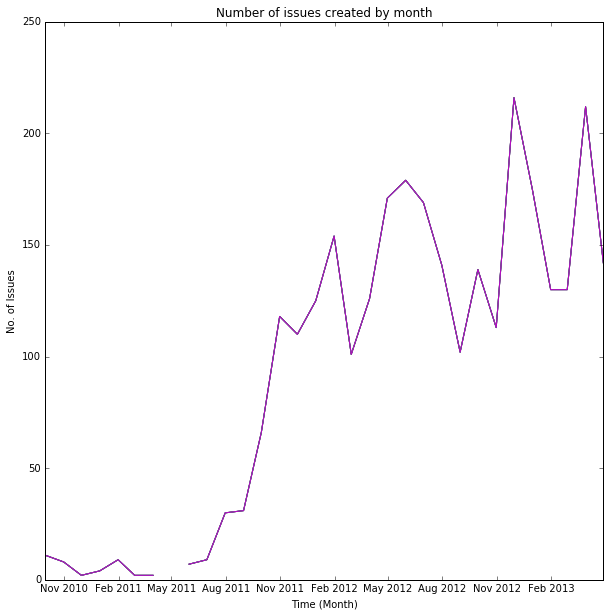

In [23]:
plt.plot(tmp3) 
plt.title('Number of issues created by month')
plt.xlabel('Time (Month)')
plt.ylabel('No. of Issues')

In [24]:
# 5) Now construct appropriate time series and pandas functions to make the following plots:
# Number of distinct users creating issues each month (hint: you can pass a function to resample's how argument, and there's nothing 
# wrong with having string values in a TimeSeries)

In [25]:
test = data_cl.groupby(['created_at']).user.nunique()
test.head(3)

created_at
2010-09-29 00:45:31    1
2010-09-29 00:50:13    1
2010-09-29 00:50:52    1
Name: user, dtype: int64

In [26]:
data_cl.set_index('created_at', inplace=True) ## setting "created_at" as the index

In [27]:
#data_cl.index[2].month
#data_cl.index[2].date

In [28]:
tmp4 = data_cl.user.resample('M',lambda x: x.nunique())
tmp4.head(3)

created_at
2010-09-30    2
2010-10-31    3
2010-11-30    2
Freq: M, Name: user, dtype: int64

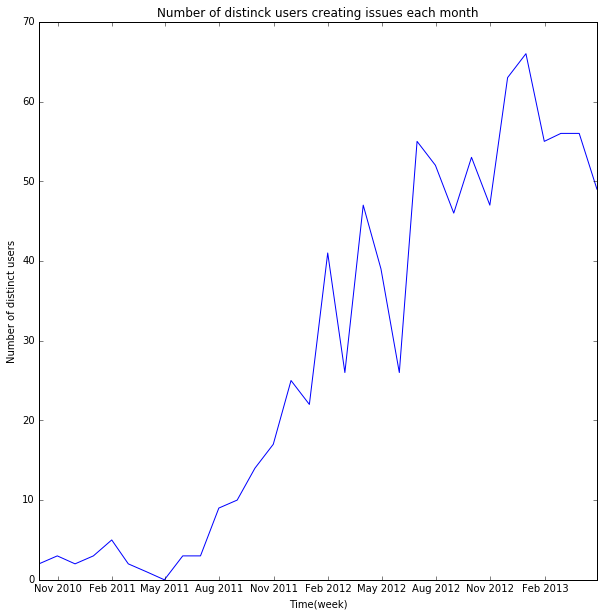

In [29]:
plt.plot(tmp4)
plt.title('Number of distinck users creating issues each month')
plt.xlabel('Time(week)')
plt.ylabel('Number of distinct users')

In [30]:
### ------------ Task 6 -----------------
# Make a table and an accompanying plot illustrating:
# The mean number of days it took for issues to be closed by the month they were opened. In other words, for closed issues created 
# in August 2012, how long were they open on average? (hint: use the total_seconds function on the timedelta objects computed when 
# subtracting datetime objects). Also show the number of issues in each month in the table.

In [31]:
data_cl = data_cl.reset_index()

In [32]:
data_cl.head(3)

,created_at,title,labels,closed_at,user,id
0,2010-09-29 00:45:31,Enable element-wise comparison operations in D...,[],2011-02-19 23:13:48,wesm,337721
1,2010-09-29 00:50:13,reindex_like function,[],2010-12-17 02:57:33,wesm,337726
2,2010-09-29 00:50:52,Binary operations on int DataMatrix,[],2011-01-01 23:50:12,wesm,337728


In [33]:
test = data_cl.closed_at[0] - data_cl.created_at[0]
test.total_seconds()

12436097.0

In [34]:
data_cl["ttl_period"] = (data_cl.closed_at[:] - data_cl.created_at[:])

In [35]:
data_cl.head(3)

,created_at,title,labels,closed_at,user,id,ttl_period
0,2010-09-29 00:45:31,Enable element-wise comparison operations in D...,[],2011-02-19 23:13:48,wesm,337721,143 days 22:28:17
1,2010-09-29 00:50:13,reindex_like function,[],2010-12-17 02:57:33,wesm,337726,79 days 02:07:20
2,2010-09-29 00:50:52,Binary operations on int DataMatrix,[],2011-01-01 23:50:12,wesm,337728,94 days 22:59:20


In [36]:
for i in range(len(data_cl.index)):
    data_cl.loc[i,'ttl_days'] = (data_cl.loc[i,'ttl_period'].total_seconds())/(24*60*60)

In [37]:
data_cl.head(3)

,created_at,title,labels,closed_at,user,id,ttl_period,ttl_days
0,2010-09-29 00:45:31,Enable element-wise comparison operations in D...,[],2011-02-19 23:13:48,wesm,337721,143 days 22:28:17,143.936308
1,2010-09-29 00:50:13,reindex_like function,[],2010-12-17 02:57:33,wesm,337726,79 days 02:07:20,79.088426
2,2010-09-29 00:50:52,Binary operations on int DataMatrix,[],2011-01-01 23:50:12,wesm,337728,94 days 22:59:20,94.957870


In [38]:
tmp5 = data_cl.groupby(["created_at"]).sum()
tmp5.head(3)

,id,ttl_days
created_at,,
2010-09-29 00:45:31,337721,143.936308
2010-09-29 00:50:13,337726,79.088426
2010-09-29 00:50:52,337728,94.957870


In [39]:
type(tmp5)

pandas.core.frame.DataFrame

In [40]:
tmp5 = tmp5.resample("M", how="mean")
tmp5.head(3)

,id,ttl_days
created_at,,
2010-09-30,339058.181818,138.126743
2010-10-31,358230.000000,250.998575
2010-11-30,428772.500000,13.748501


In [41]:
tmp6 = data_cl.groupby(["created_at"]).count()
tmp6.head(3)

,title,labels,closed_at,user,id,ttl_period,ttl_days
created_at,,,,,,,
2010-09-29 00:45:31,1,1,1,1,1,1,1
2010-09-29 00:50:13,1,1,1,1,1,1,1
2010-09-29 00:50:52,1,1,1,1,1,1,1


In [42]:
tmp6 = tmp6.resample("M", how="sum")
tmp6.head(3)

,title,labels,closed_at,user,id,ttl_period,ttl_days
created_at,,,,,,,
2010-09-30,11,11,11,11,11,11,11
2010-10-31,8,8,8,8,8,8,8
2010-11-30,2,2,2,2,2,2,2


In [43]:
df1 = tmp6.reset_index()[['created_at','title']]
df2 = tmp5.reset_index()[['created_at','ttl_days']]

In [44]:
tmp7 = pd.merge(df1, df2, on='created_at', how='outer')
tmp7

,created_at,title,ttl_days
0,2010-09-30,11,138.126743
1,2010-10-31,8,250.998575
2,2010-11-30,2,13.748501
3,2010-12-31,4,2.988186
4,2011-01-31,9,52.976615
5,2011-02-28,2,3.726192
6,2011-03-31,2,6.395295
7,2011-04-30,NaN,NaN
8,2011-05-31,7,64.154239
9,2011-06-30,9,49.036619


In [45]:
tmp7.set_index('created_at',inplace=True)

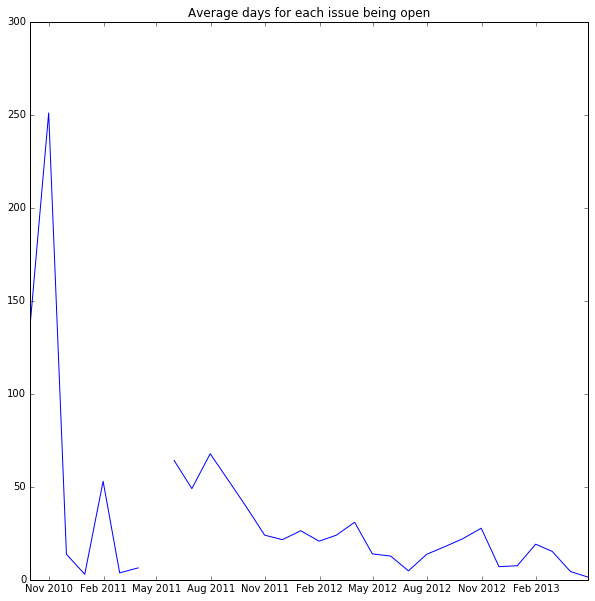

In [46]:
plt.plot(tmp7.ttl_days)
plt.title("Average days for each issue being open")

In [47]:
### -------------- Task7 ---------------- ###
# Make a DataFrame containing all the comments for all of the issues. You will want to add an id attribute to each comment while 
# doing so so that each row contains a single comment and has the id of the issue it belongs to.
# Convert the created column to datetime format; note you will need to multiply the values (appropriately converted to integers) 
# by 1000000 to get them in nanoseconds and pass to to_datetime.

In [48]:
df2 = df[['created_at', 'closed_at', 'id','comments']]
df2.head(3) 

,created_at,closed_at,id,comments
0,2010-09-29 00:45:31,2011-02-19 23:13:48,337721,"[{'created': '1298157227000', 'text': 'impleme..."
1,2010-09-29 00:45:31,2011-02-19 23:13:48,337721,"[{'created': '1298157227000', 'text': 'impleme..."
2,2010-09-29 00:50:13,2010-12-17 02:57:33,337726,"[{'created': '1292554653000', 'text': 'done', ..."


In [49]:
df2_cl = df2.drop_duplicates(["id"])

In [50]:
df2_cl.comments[0:5]

0    [{'created': '1298157227000', 'text': 'impleme...
2    [{'created': '1292554653000', 'text': 'done', ...
4    [{'created': '1293925812000', 'text': 'I guess...
6    [{'created': '1292048072000', 'text': 'fixed',...
8    [{'created': '1292553994000', 'text': 'Everyth...
Name: comments, dtype: object

In [51]:
df2_cl.shape

(2934, 4)

In [52]:
df2_cl.comments[2967]  ## one issue may have multiple comments

[{'author': 'y-p',
  'created': '1367197211000',
  'text': "I think the benefit is marginal. the test scripts report coverage, and I imagine\r\nfor doing coverage work, you'd work locally rather then sending things off to travis.\r\n\r\n\r\n\r\n",
  'updated': '1367197211000'},
 {'author': 'cpcloud',
  'created': '1367197492000',
  'text': 'Cool.',
  'updated': '1367197492000'}]

In [53]:
df2_cl.comments[0][0].keys()

dict_keys(['created', 'text', 'updated', 'author'])

In [54]:
df2_cl.index

Int64Index([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,
            ...
            2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967],
           dtype='int64', length=2934)

In [55]:
df2_cl.index[0:3]

Int64Index([0, 2, 4], dtype='int64')

In [56]:
df2_cl.index[0:61]

Int64Index([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
            34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94],
           dtype='int64')

In [57]:
df2_cl.loc[94]

created_at    2011-07-18 15:37:46
closed_at     2012-04-12 03:17:15
id                        1242420
comments                       []
Name: 94, dtype: object

In [58]:
pd.DataFrame(df2_cl.comments[94]).empty

True

In [59]:
result = pd.DataFrame()

for i in df2_cl.index: #df2_cl.index caused errors
    tmp = pd.DataFrame(df2_cl.comments[i])
    if tmp.empty == True:
        continue
    else:
        tmp.loc[:,'id'] = df2_cl.loc[i,'id']
        result = result.append(pd.DataFrame(tmp))

In [60]:
result.head(10)

,author,created,text,updated,id
0,wesm,1298157227000,implemented in git HEAD,1298157227000,337721
0,wesm,1292554653000,done,1292554653000,337726
0,wesm,1293925812000,I guess I &quot;accidentally&quot; fixed this ...,1293925812000,337728
0,wesm,1292048072000,fixed,1292048072000,337730
0,wesm,1292553994000,Everything seems to be working in Python 2.7 w...,1292553994000,337736
0,wesm,1292047526000,All fixed up and wrote unit tests--hopefully d...,1292047526000,337994
0,wesm,1285813365000,This is a bug. DataMatrix as input to the Data...,1285813365000,338909
1,hector13,1286126735000,I've noticed a similar issue when using the di...,1286126735000,338909
2,wesm,1292047919000,should be fixed in git HEAD,1292047919000,338909
0,wesm,1285812707000,In principle I agree with you that fill should...,1285812707000,339355


In [61]:
result.dtypes

author      object
created     object
text        object
updated     object
id         float64
dtype: object

In [62]:
result['created'] = pd.to_datetime(result.created.astype(float)*1000000)

In [63]:
result.head(3)

,author,created,text,updated,id
0,wesm,2011-02-19 23:13:47,implemented in git HEAD,1298157227000,337721
0,wesm,2010-12-17 02:57:33,done,1292554653000,337726
0,wesm,2011-01-01 23:50:12,I guess I &quot;accidentally&quot; fixed this ...,1293925812000,337728


In [64]:
### --------------------- Task 8 ------------------------- ###
# For each month, compute a table summarizing the following for each month:
# Total number of issue comments
# The "chattiest" user (most number of comments)
# The percentage of total comments made by the chattiest users
# The number of distinct participants in the issue comments

In [65]:
df8 = result.copy()

In [66]:
df8.set_index('created', inplace=True) 

In [67]:
df8.head(3)

,author,text,updated,id
created,,,,
2011-02-19 23:13:47,wesm,implemented in git HEAD,1298157227000,337721
2010-12-17 02:57:33,wesm,done,1292554653000,337726
2011-01-01 23:50:12,wesm,I guess I &quot;accidentally&quot; fixed this ...,1293925812000,337728


In [68]:
ts8_1 = df8.resample('M',how="count")

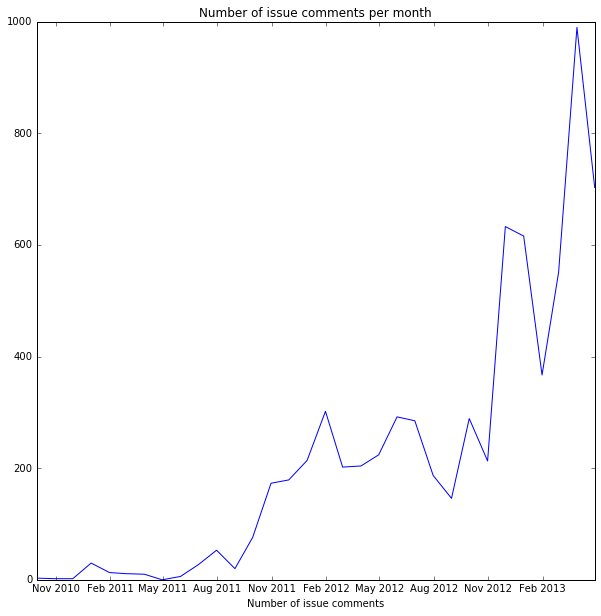

In [69]:
plt.plot(ts8_1.text)
plt.xlabel("period (month)")
plt.xlabel("Number of issue comments")
plt.title("Number of issue comments per month")

In [71]:
df8.head(3)

,author,text,updated,id
created,,,,
2011-02-19 23:13:47,wesm,implemented in git HEAD,1298157227000,337721
2010-12-17 02:57:33,wesm,done,1292554653000,337726
2011-01-01 23:50:12,wesm,I guess I &quot;accidentally&quot; fixed this ...,1293925812000,337728


In [72]:
df8.reset_index(inplace=True)

In [73]:
tmp = df8.pivot_table(values = 'text', index = 'created', columns = 'author', aggfunc = 'count')
tmp2 = tmp.resample('M', how='count')

In [74]:
tmp2

author,Aldanor,Altons,Anaphory,BenjaminKay,Bklyn,CRP,CerebralMastication,DanielMorton,DataJunkie,FedericoV,...,xamox,xdong,y-p,yangzetian,yarden,yarikoptic,yashoteja,yinhm,yishenggudou,zachcp
created,,,,,,,,,,,,,,,,,,,,,
2010-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-11-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-02-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
argmax(tmp2.ix[1,:])

'hector13'

In [76]:
# The "chattiest" user (most number of comments)
ts8_2 = tmp2.apply(lambda x: argmax(x), axis = 1) #axis=1 apply function to each row
ts8_2.head(6)

created
2010-09-30        wesm
2010-10-31    hector13
2010-11-30        wesm
2010-12-31        wesm
2011-01-31        wesm
2011-02-28        wesm
Freq: M, dtype: object

In [77]:
# The percentage of total comments made by the chattiest users
# The number of distinct participants in the issue comments

In [78]:
tmp3 = tmp2.apply(sum, axis=1)
tmp3.head(6)

created
2010-09-30     3
2010-10-31     2
2010-11-30     2
2010-12-31    30
2011-01-31    13
2011-02-28    11
Freq: M, dtype: int64

In [79]:
ts8_3 = tmp2.apply(lambda x:max(x), axis=1)/tmp3
ts8_3

created
2010-09-30    1.000000
2010-10-31    0.500000
2010-11-30    1.000000
2010-12-31    0.733333
2011-01-31    0.846154
2011-02-28    0.909091
2011-03-31    0.500000
2011-04-30         NaN
2011-05-31    0.500000
2011-06-30    0.925926
2011-07-31    0.603774
2011-08-31    0.750000
2011-09-30    0.763158
2011-10-31    0.641618
2011-11-30    0.687151
2011-12-31    0.626168
2012-01-31    0.480132
2012-02-29    0.447761
2012-03-31    0.225490
2012-04-30    0.486607
2012-05-31    0.523973
2012-06-30    0.515789
2012-07-31    0.352941
2012-08-31    0.390411
2012-09-30    0.564014
2012-10-31    0.347418
2012-11-30    0.369668
2012-12-31    0.340909
2013-01-31    0.234332
2013-02-28    0.328494
2013-03-31    0.350505
2013-04-30    0.348506
Freq: M, dtype: float64

In [80]:
# The number of distinct participants in the issue comments

In [81]:
tmp2.apply(lambda x: x[x!=0].count(), axis = 1)

created
2010-09-30     1
2010-10-31     2
2010-11-30     1
2010-12-31     4
2011-01-31     2
2011-02-28     2
2011-03-31     3
2011-04-30     0
2011-05-31     2
2011-06-30     2
2011-07-31     8
2011-08-31     5
2011-09-30    11
2011-10-31    18
2011-11-30    26
2011-12-31    22
2012-01-31    30
2012-02-29    23
2012-03-31    33
2012-04-30    34
2012-05-31    26
2012-06-30    39
2012-07-31    37
2012-08-31    41
2012-09-30    40
2012-10-31    40
2012-11-30    60
2012-12-31    58
2013-01-31    46
2013-02-28    40
2013-03-31    58
2013-04-30    51
Freq: M, dtype: int64

In [ ]:
### ---------------- Task 9 --------------------- ###
# Create a helper labels table from the issues data with two columns: id and label. If an issue has 3 elements in its 'labels' 
# value, add 3 rows to the table. If an issue does not have any labels, place a single row with None as the label (hint: 
# construct a list of tuples, then make the DataFrame).

In [113]:
data_cl['labels']
data_cl['labels'][7]

[{'color': 'e10c02',
  'name': 'Bug',
  'url': 'https://api.github.com/repos/pydata/pandas/labels/Bug'}]

In [130]:
data_cl['labels'][12][0]

{'color': '4E9A06',
 'name': 'Enhancement',
 'url': 'https://api.github.com/repos/pydata/pandas/labels/Enhancement'}

In [151]:
pd.DataFrame.from_dict(data_cl['labels'][12][0], orient='index')

,0
name,Enhancement
url,https://api.github.com/repos/pydata/pandas/lab...
color,4E9A06


In [178]:
ts9 = pd.DataFrame()
for i in data_cl.index:
    check = data_cl['labels'][i]
    if len(check)==0:
        tmp = pd.DataFrame([None])
    else:
        tmp = pd.DataFrame.from_dict(check[0], orient='index')
    tmp.loc[:,'id'] = data_cl.loc[i,'id']
    ts9 = ts9.append(pd.DataFrame(tmp))

In [180]:
ts9.head(10)

,0,id
0,NaN,337721
0,NaN,337726
0,NaN,337728
0,NaN,337730
0,NaN,337736
0,NaN,337994
0,NaN,338909
name,Bug,339355
url,https://api.github.com/repos/pydata/pandas/lab...,339355
color,e10c02,339355


In [185]:
ts9.columns = ['labels','id']
ts9.columns

Index(['labels', 'id'], dtype='object')

In [ ]:
### ------------------- Task 10 -------------------- ###
# Now, join the issues data with the labels helper table (pandas.merge). Add a column to this table containing the number of days
# (as a floating point number) it took to close each issue.

In [99]:
data_cl.head(3)

,created_at,title,labels,closed_at,user,id,ttl_period,ttl_days
0,2010-09-29 00:45:31,Enable element-wise comparison operations in D...,[],2011-02-19 23:13:48,wesm,337721,143 days 22:28:17,143.936308
1,2010-09-29 00:50:13,reindex_like function,[],2010-12-17 02:57:33,wesm,337726,79 days 02:07:20,79.088426
2,2010-09-29 00:50:52,Binary operations on int DataMatrix,[],2011-01-01 23:50:12,wesm,337728,94 days 22:59:20,94.957870


In [272]:
ts10 = pd.merge(ts9, data_cl[["id","ttl_days",'created_at']], on='id', how='left')
ts10.head(10)

,labels,id,ttl_days,created_at
0,NaN,337721,143.936308,2010-09-29 00:45:31
1,NaN,337726,79.088426,2010-09-29 00:50:13
2,NaN,337728,94.957870,2010-09-29 00:50:52
3,NaN,337730,73.224363,2010-09-29 00:51:27
4,NaN,337736,79.076088,2010-09-29 00:57:00
5,NaN,337994,73.023958,2010-09-29 05:30:56
6,NaN,338909,72.604225,2010-09-29 15:41:55
7,Bug,339355,266.377986,2010-09-29 19:45:47
8,https://api.github.com/repos/pydata/pandas/lab...,339355,266.377986,2010-09-29 19:45:47
9,e10c02,339355,266.377986,2010-09-29 19:45:47


In [ ]:
### ------------------ Task 11 ---------------------- ###
# Compute a table containing the average time to close for each label type. Now make a plot comparing mean time to close by 
# month for Enhancement versus Bug issue types

In [201]:
#pd.unique(ts10['labels'].values.ravel())

array(['Bug', 'Enhancement'], dtype=object)

In [273]:
ts10.set_index("created_at",inplace=True)

In [274]:
ts10.head(3)   #df.groupby(['State','City']).resample('2D', how='sum'))

,labels,id,ttl_days
created_at,,,
2010-09-29 00:45:31,NaN,337721,143.936308
2010-09-29 00:50:13,NaN,337726,79.088426
2010-09-29 00:50:52,NaN,337728,94.957870


In [299]:
ts11 = ts10.groupby("labels").resample('M', how='mean')
ts11_sub = ts11.loc[['Bug','Enhancement']]
ts11_sub

id    ttl_days
labels      created_at                             
Bug         2010-09-30    339355.000000  266.377986
            2010-10-31    358952.000000  347.543206
            2010-11-30              NaN         NaN
            2010-12-31              NaN         NaN
            2011-01-31              NaN         NaN
            2011-02-28              NaN         NaN
            2011-03-31              NaN         NaN
            2011-04-30              NaN         NaN
            2011-05-31    934142.000000   33.252731
            2011-06-30    997165.000000   11.207095
            2011-07-31   1256783.250000    4.958562
            2011-08-31   1427368.400000    7.898266
            2011-09-30   1674071.823529   16.541055
            2011-10-31   1946132.347826    0.877039
            2011-11-30   2238229.128205   12.529646
            2011-12-31   2568587.380952   24.773159
            2012-01-31   2895496.212766   11.906952
            2012-02-29   3218979.105263   17.877019
            2012-03-31   3625795.363636   15.870630
            2012-04-30   4171357.229508   14.057429
            2012-05-31   4659989.761905    5.774539
            2012-06-30   5075402.454545    5.863773
            2012-07-31   5686515.000000   11.086846
            2012-08-31   6259953.036364   19.459502
            2012-09-30   6889600.452830   16.765104
            2012-10-31   7652522.133333   18.552517
            2012-11-30   8384332.704225    5.523776
            2012-12-31   9298670.142857    8.546535
            2013-01-31  10067843.137255   25.682938
            2013-02-28  11004344.846154   26.134213
...                                 ...         ...
Enhancement 2010-10-31    355659.500000  533.081742
            2010-11-30              NaN         NaN
            2010-12-31              NaN         NaN
            2011-01-31              NaN         NaN
            2011-02-28              NaN         NaN
            2011-03-31              NaN         NaN
            2011-04-30              NaN         NaN
            2011-05-31    871752.000000   96.560625
            2011-06-30   1037451.200000   85.967657
            2011-07-31   1258927.666667  119.811086
            2011-08-31   1428177.687500   95.754086
            2011-09-30   1673318.379310   76.460589
            2011-10-31   1947878.175439   43.084590
            2011-11-30   2222818.428571   51.496578
            2011-12-31   2542667.578947   35.103528
            2012-01-31   2874335.903226   61.506458
            2012-02-29   3256823.517241   48.532379
            2012-03-31   3621623.842105   55.648663
            2012-04-30   4183007.258621   17.650950
            2012-05-31   4629602.534884   34.015798
            2012-06-30   5016312.576923    6.902824
            2012-07-31   5656448.750000   17.947831
            2012-08-31   6289160.857143   37.492983
            2012-09-30   6871250.142857   57.428695
            2012-10-31   7662703.300000   42.573476
            2012-11-30   8485036.461538   28.846859
            2012-12-31   9193907.214286   14.790393
            2013-01-31   9978525.545455   31.101432
            2013-02-28  11015998.750000   20.665877
            2013-03-31  12149226.857143    4.146534

[62 rows x 2 columns]

In [300]:
ts11_sub[pd.isnull(ts11_sub)]=0
ts11_sub.head(6)

c:\Users\farahshih\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\Users\farahshih\Anaconda3\lib\site-packages\pandas\core\frame.py:2334: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)


id    ttl_days
labels created_at                    
Bug    2010-09-30  339355  266.377986
       2010-10-31  358952  347.543206
       2010-11-30       0    0.000000
       2010-12-31       0    0.000000
       2011-01-31       0    0.000000
       2011-02-28       0    0.000000

In [301]:
ts11_sub = ts11_sub.reset_index()

In [304]:
final = ts11_sub.pivot_table(index='created_at',columns='labels',values="ttl_days")
final.head(3)

labels,Bug,Enhancement
created_at,,
2010-09-30,266.377986,NaN
2010-10-31,347.543206,533.081742
2010-11-30,0.000000,0.000000


In [306]:
final=final.fillna(0)

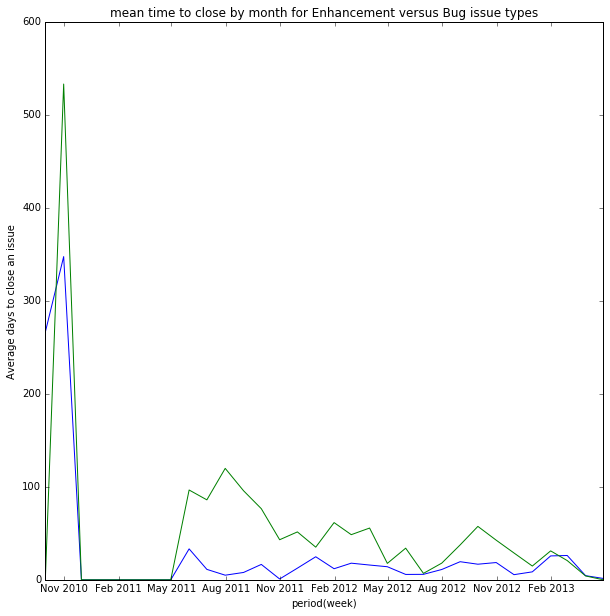

In [309]:
plt.plot(final)
plt.xlabel("period(week)")
plt.ylabel("Average days to close an issue")
plt.title("mean time to close by month for Enhancement versus Bug issue types")